In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import ScalarFormatter, NullFormatter, FixedLocator, NullLocator
import pandas as pd
import math

%matplotlib inline

In [2]:
sources = ['0258+35', '1014+392', '1025+390', '1037+30', '1128+455','1201+394','1203+645','1221-423','1445+410']

In [5]:
for i in range(len(sources)):
    df = pd.read_csv(sources[i]+'_sed.csv', header=0)
    display(df)

,wavelength,mag,mag_err
0,1500,NaN,NaN
1,2250,18.63,0.1500
2,2359,NaN,NaN
3,6219,12.32,0.0042
4,4810,12.88,0.0050
5,6156,11.59,0.0050
6,7504,11.22,0.0050
7,8668,10.62,0.0050
8,9613,9.45,0.0050
9,34000,8.37,0.0000


,wavelength,mag,mag_err
0,1500,NaN,NaN
1,2250,21.75,0.030
2,2359,NaN,NaN
3,6219,20.64,0.240
4,4810,22.05,0.050
5,6156,20.30,0.010
6,7504,19.64,0.005
7,8668,19.41,0.005
8,9613,17.53,0.005
9,34000,14.70,0.033


,wavelength,mag,mag_err
0,1500,21.91,0.060
1,2250,21.28,0.040
2,2359,22.66,0.390
3,6219,18.27,0.070
4,4810,19.51,0.005
5,6156,17.97,0.005
6,7504,17.22,0.005
7,8668,16.74,0.005
8,9613,15.86,0.005
9,34000,13.96,0.027


,wavelength,mag,mag_err
0,1500,20.66,0.280
1,2250,19.36,0.110
2,2359,19.85,0.220
3,6219,16.05,0.020
4,4810,16.01,0.005
5,6156,15.21,0.005
6,7504,14.83,0.005
7,8668,14.32,0.005
8,9613,13.21,0.005
9,34000,12.45,0.020


,wavelength,mag,mag_err
0,1500,NaN,NaN
1,2250,23.41,0.140
2,2359,22.91,0.670
3,6219,19.54,0.130
4,4810,21.03,0.005
5,6156,19.34,0.005
6,7504,18.79,0.005
7,8668,18.24,0.005
8,9613,16.99,0.005
9,34000,15.15,0.035


,wavelength,mag,mag_err
0,1500,NaN,NaN
1,2250,22.46,0.520
2,2359,24.57,1.060
3,6219,19.68,0.160
4,4810,21.39,0.005
5,6156,19.64,0.005
6,7504,18.61,0.005
7,8668,18.05,0.005
8,9613,16.63,0.005
9,34000,15.04,0.034


,wavelength,mag,mag_err
0,1500,NaN,NaN
1,2250,23.15,0.220
2,2359,22.74,0.810
3,6219,20.33,0.180
4,4810,23.34,0.001
5,6156,20.10,0.001
6,7504,19.51,0.001
7,8668,18.12,0.001
8,9613,20.96,0.001
9,34000,13.51,0.024


,wavelength,mag,mag_err
0,1500,21.14,0.40
1,2250,19.66,0.14
2,2359,19.45,0.43
3,6219,17.75,0.06
4,4810,NaN,NaN
5,6156,NaN,NaN
6,7504,NaN,NaN
7,8668,NaN,NaN
8,9613,NaN,NaN
9,34000,11.98,0.02


,wavelength,mag,mag_err
0,1500,NaN,NaN
1,2250,21.87,0.160
2,2359,NaN,NaN
3,6219,18.47,0.070
4,4810,19.17,0.005
5,6156,17.73,0.005
6,7504,17.00,0.005
7,8668,16.58,0.005
8,9613,15.44,0.005
9,34000,14.38,0.027


In [6]:
def add_flux_cols(df):

    c = 3.0e18     # in Angstrom/sec
 
    df['nu'] = c/df['wavelength']
    df['Fnu'] = 10**(-(df['mag'] + 48.6)/2.5)
    df['Fnu_err'] = df['Fnu']*2.303*df['mag_err']  
    
    print(df)
    
    return df


In [7]:
def readfile(target):
    
    data = pd.read_csv(target+'_sed.csv', header=0)
    
    df = add_flux_cols(data)
    
    x = df['nu']
    y = df['Fnu']
    yerr = df['Fnu_err']
    
    # GALEX : rows 0,1
    x0 = x[:2]
    y0 = y[:2]
    yerr0 = yerr[:2]

    # HST U: row 2
    x1 = x[2]
    y1 = y[2]
    yerr1 = yerr[2]
    
    # HST V: row 3
    x2 = x[3]
    y2 = y[3]
    yerr2 = yerr[3]
    
    # PanSTARRS : rows 4,5,6,7,8
    x3 = x[4:9]
    y3 = y[4:9]
    yerr3 = yerr[4:9]
    
    # WISE : rows 9,10,11,12
    x4 = x[9:]
    y4 = y[9:]
    yerr4 = yerr[9:]
    
    return x0,y0,yerr0,x1,y1,yerr1,x2,y2,yerr2,x3,y3,yerr3,x4,y4,yerr4


In [12]:
def set_plot():

    fig, axes = plt.subplots(3, 3, figsize=(17,22)) 
    plt.subplots_adjust(wspace=0.4, hspace=0.3)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['axes.linewidth'] = 1.0

    for ax in fig.get_axes():
        
        ax.grid(True, which='major', axis='both', color='lightgray')  
        ax.yaxis.grid(True, 'minor', linewidth=.25, alpha=0.5) 
        ax.xaxis.grid(True, 'minor', linewidth=.25, alpha=0.5)
        ax.set_axisbelow(True)      
        ax.spines['bottom'].set_color('k')
        ax.spines['top'].set_color('k') 
        ax.spines['right'].set_color('k')
        ax.spines['left'].set_color('k')
        ax.yaxis.labelpad = 10
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlim(50e11, 50e14)
        ax.yaxis.set_ticks_position('both')    
        ax.xaxis.set_ticks_position('both')
        ax.tick_params(axis='both',direction='in',which='both',length=6, pad=8.0) 
        ax.tick_params(which='minor',length=3)
    
    return fig, axes 



In [29]:
def plot_sed(figure, axes, target, i, j):
    
    gx,gy,gyerr,hux,huy,huyerr,hx,hy,hyerr,px,py,pyerr,wx,wy,wyerr = readfile(target)
    l=['GALEX', 'HST/UVIS U', 'HST/UVIS V', 'PanSTARRS', 'WISE']

    #plotting nuF_nu vs nu
    axes[i,j].scatter(gx,gy*gx, s=30, color='blueviolet', marker='D', label=l[0])
    axes[i,j].errorbar(gx,gy*gx, gyerr*gx, color='k',ls='none', linewidth=0.5, capsize=2)
    axes[i,j].scatter(hux,huy*hux, s=60, color='royalblue', marker='^', label=l[1])
    axes[i,j].errorbar(hux,huy*hux, huyerr*hux, color='k',ls='none', linewidth=0.5, capsize=2)
    axes[i,j].scatter(hx,hy*hx, s=60, color='limegreen', marker='^', label=l[2])
    axes[i,j].errorbar(hx,hy*hx, hyerr*hx, color='k',ls='none', linewidth=0.5, capsize=2)
    axes[i,j].scatter(px,py*px, s=30, color='lightseagreen', marker='D', label=l[3])
    axes[i,j].errorbar(px,py*px, pyerr*px, color='k',ls='none', linewidth=0.5, capsize=2)
    axes[i,j].scatter(wx,wy*wx, s=30, color='green', marker='D', label=l[4])
    axes[i,j].errorbar(wx,wy*wx, wyerr*wx, color='k',ls='none', linewidth=0.5, capsize=2)
    axes[i,j].set_title(target, fontsize=18, pad=10)
    axes[i,j].set_xlabel('\u03BD (Hz)',fontsize=14)
    axes[i,j].set_ylabel(' \u03BDF$_{\u03BD}$  (ergs sec$^{-1}$ cm$^{-2}$)',fontsize=14)

    
    handles, labels = axes[i,j].get_legend_handles_labels()
    lgd = figure.legend(handles, labels, loc = (0.25,0.95), ncol=5, fontsize=12)

    return lgd  

    wavelength    mag  mag_err            nu           Fnu       Fnu_err
0         1500    NaN      NaN  2.000000e+15           NaN           NaN
1         2250  18.63   0.1500  1.333333e+15  1.282331e-27  4.429811e-28
2         2359    NaN      NaN  1.271725e+15           NaN           NaN
3         6219  12.32   0.0042  4.823927e+14  4.285485e-25  4.145178e-27
4         4810  12.88   0.0050  6.237006e+14  2.558586e-25  2.946212e-27
5         6156  11.59   0.0050  4.873294e+14  8.394600e-25  9.666382e-27
6         7504  11.22   0.0050  3.997868e+14  1.180321e-24  1.359139e-26
7         8668  10.62   0.0050  3.461006e+14  2.051162e-24  2.361913e-26
8         9613   9.45   0.0050  3.120774e+14  6.025596e-24  6.938474e-26
9        34000   8.37   0.0000  8.823529e+13  1.629296e-23  0.000000e+00
10       46000   8.38   0.0000  6.521739e+13  1.614359e-23  0.000000e+00
11      120000   6.99   0.0000  2.500000e+13  5.807644e-23  0.000000e+00
12      220000   4.96   0.0000  1.363636e+13  3.767

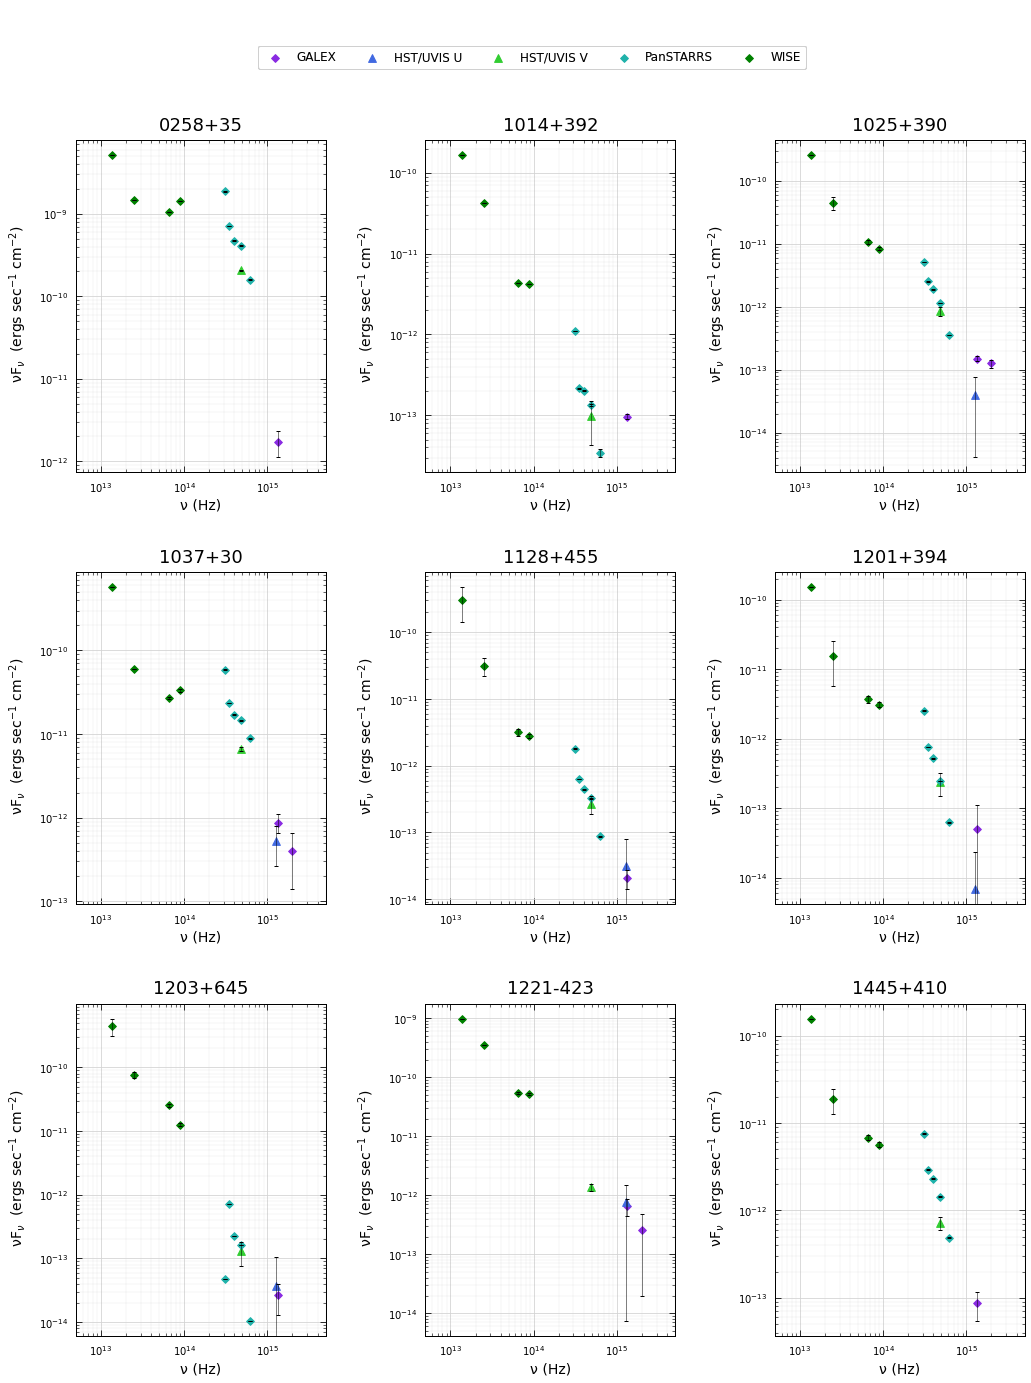

In [30]:
fig, axes = set_plot()

i = 0    
j = 0
for k in range(0,3):
    lgds = plot_sed(fig, axes, sources[k], i, j)
    j+=1

i = 1    
j = 0
for k in range(3,6):
    lgds = plot_sed(fig, axes, sources[k], i, j)
    j+=1
        
i = 2   
j = 0
for k in range(6,9):
    lgds = plot_sed(fig, axes, sources[k], i, j)
    j+=1
